# Hola Aylin! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Hola Aylin, muy buen trabajo con la exploración y limpieza inicial de la data, está hecha con mucho detalle, lo cual es importante para un correcto entrenamiento de los modelos posteriormente. Por otro lado, debes utilizar una data con menos columnas, a mayor cantidad de columnas, mayor es el requerimiento de datos para que los algoritmos de machine learning puedan realizar un aprendizaje correcto. Te dejé un comentario en esa parte, revisalo y prueba con los modelos nuevamente.
    
Saludos!
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien hecho Aylin, has completado todo lo necesario del notebook. No tengo más comentarios de corrección a realizar, tu notebook está aprobado.
    
Saludos!
</div>

----

# Proyecto 13: Valor de mercado para Rusty Bargain

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [29]:
import pandas as pd
import numpy as np

import sklearn.metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
import time

import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split

from IPython.display import display

In [30]:
df = pd.read_csv("C:\\Users\\aylin\\Downloads\\car_data.csv")


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [32]:
df.describe(include = 'all')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,15470,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,18592
top,05/03/2016 14:25,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,03/04/2016 00:00,NaN,NaN,07/04/2016 07:16
freq,66,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,654
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


In [33]:
df.sample(15, random_state = 5456)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
238236,11/03/2016 20:54,5600,small,2010,manual,69,500,60000,9,petrol,fiat,no,11/03/2016 00:00,0,26723,06/04/2016 05:46
293559,16/03/2016 16:45,3000,small,2005,manual,80,ypsilon,125000,3,petrol,lancia,no,16/03/2016 00:00,0,86161,06/04/2016 20:45
75798,30/03/2016 21:36,5500,wagon,2008,manual,90,astra,150000,2,lpg,opel,no,30/03/2016 00:00,0,23946,05/04/2016 13:16
91268,19/03/2016 15:51,12400,suv,2011,manual,160,yeti,90000,3,petrol,skoda,no,19/03/2016 00:00,0,71540,07/04/2016 00:46
265843,08/03/2016 15:50,1199,NaN,2017,manual,101,a4,150000,6,NaN,audi,NaN,08/03/2016 00:00,0,4315,09/03/2016 07:15
248909,04/04/2016 14:57,3250,bus,2006,manual,109,other,150000,4,petrol,citroen,no,04/04/2016 00:00,0,21423,04/04/2016 14:57
353483,16/03/2016 02:02,3850,sedan,2005,manual,140,passat,150000,2,gasoline,volkswagen,no,16/03/2016 00:00,0,95444,16/03/2016 06:59
274602,16/03/2016 15:58,2699,sedan,1998,manual,118,NaN,150000,7,petrol,bmw,no,16/03/2016 00:00,0,28259,06/04/2016 20:18
111233,08/03/2016 09:47,1350,sedan,1997,manual,170,3er,150000,5,petrol,bmw,no,08/03/2016 00:00,0,37671,08/03/2016 16:15
77415,30/03/2016 21:50,6999,sedan,2010,manual,110,golf,150000,1,gasoline,volkswagen,no,30/03/2016 00:00,0,60486,03/04/2016 15:16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

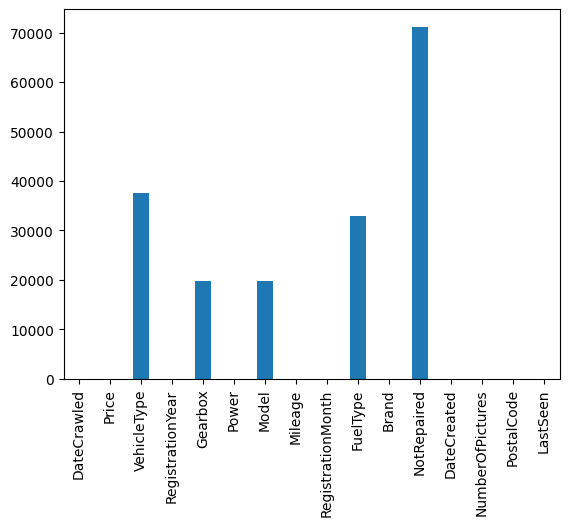

In [34]:
df.isnull().sum().plot(kind = 'bar')
df.dropna(how = 'all', inplace = True)
df.info()

<span style='color:green'> En vez de crear una nueva variable se hace sobre el DF original, en caso de haber filas con nulos en todas sus celdas las elimina y al mismo tiempo visualizamos las columnas con nulos </span>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con esta primera exploración de las variables

</div>

###  Distribucion de las variables numéricas

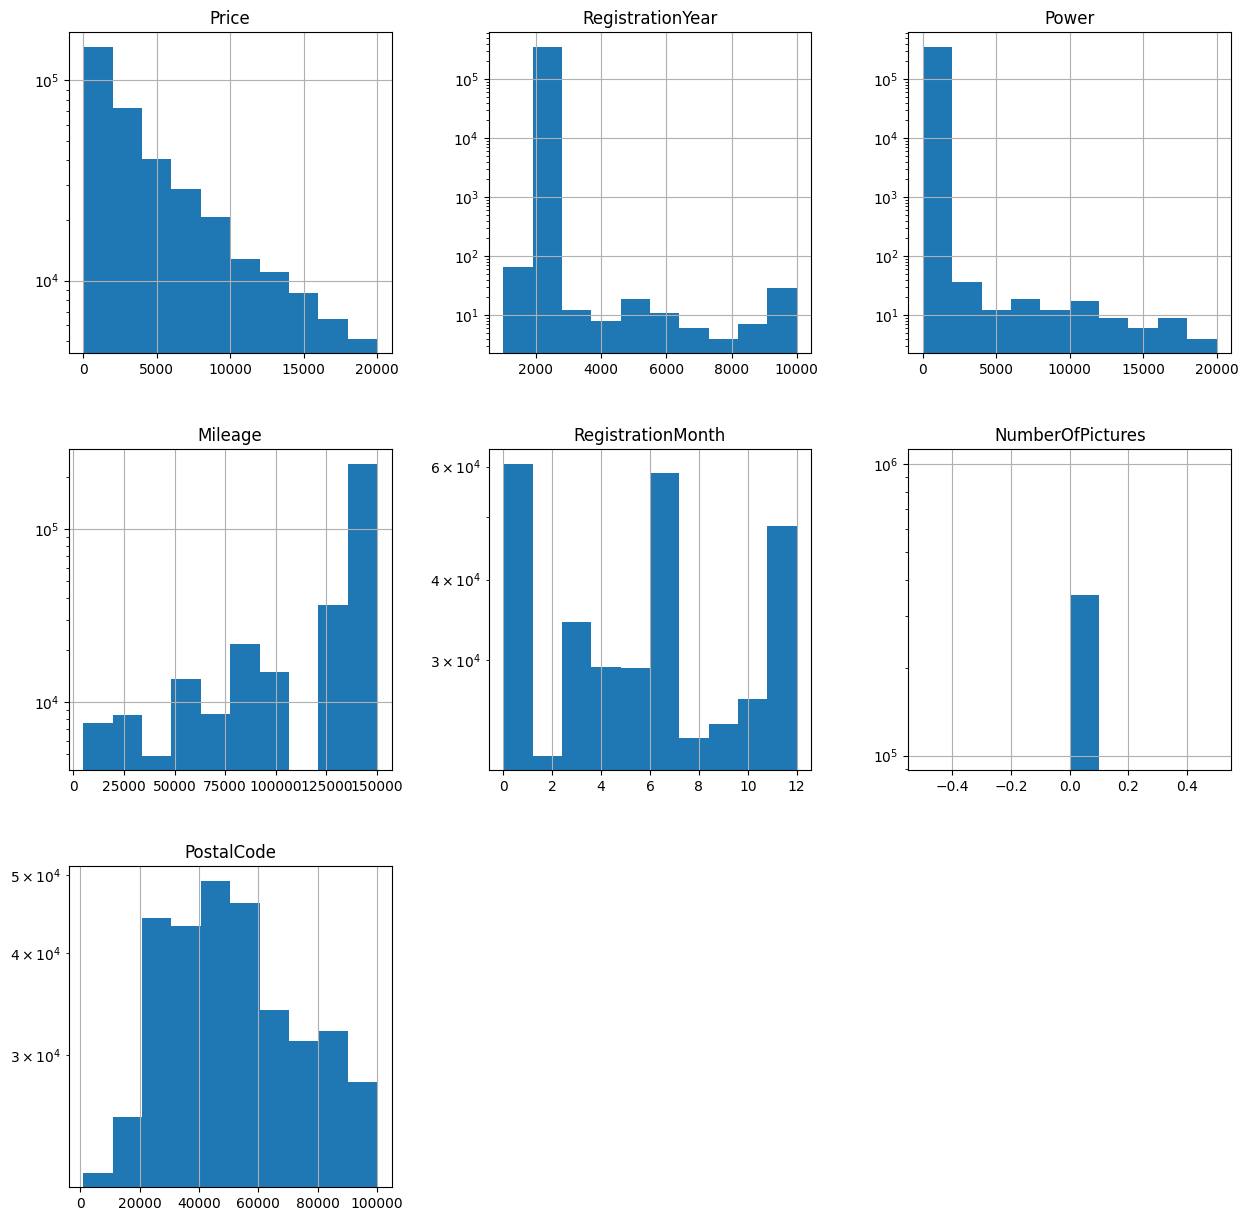

In [35]:
df.hist(figsize = (15,15), log = True)
plt.show()


<span style='color:green'> En el DF se tienen varias variables por lo que se estudian de manera logaritmica para saber a fondo que pasa con ellas </span>

<span style='color:green'> Por lo que podemos observar hay varias columnas que no son de nuestro interés para la evaluación de los datos. Al mismo tiempo tanto 'Price' como 'Power' tienen registros con mínimo de '0' cuando por lógica esto no está bien registrado. La columna 'NotRepaired' se debería codificar ya que como entrada tiene 'yes'/'no'. Y el año está codificado de una manera curiosa ya que elk máximo es 9999.  </span>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buenas observaciones, es importante tener en cuenta una noción de las variables y qué valores son realistas y qué valores no.

</div>

## Preprocesamiento de datos

### Caracterpisticas innecesarias

In [36]:
df.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated',  'NumberOfPictures', 'PostalCode', 'LastSeen', 'Model', 'Brand'], axis = 1, inplace = True)
df.drop_duplicates(inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281338 entries, 0 to 354368
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             281338 non-null  int64 
 1   VehicleType       252725 non-null  object
 2   RegistrationYear  281338 non-null  int64 
 3   Gearbox           266979 non-null  object
 4   Power             281338 non-null  int64 
 5   Mileage           281338 non-null  int64 
 6   FuelType          254274 non-null  object
 7   NotRepaired       224322 non-null  object
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

OK, pero tal vez registration month si podría haber sido útil.

</div>

### Codificación de la columna 'NotRepaired'

In [38]:
df.loc[df['NotRepaired'] == 'yes', 'NotRepaired'] = 1
df.loc[df['NotRepaired'] == 'no', 'NotRepaired'] = 0
df.fillna({'NotRepaired': 'NaN'}, inplace = True)
df['NotRepaired'].unique()

array(['NaN', 1, 0], dtype=object)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Está bien usar un string, pero no estoy seguro si querías usar un nan como tipo o como string. En todos los casos, esto sirve.

</div>

### Info extra sobre columnas: 'Price', 'Power', 'RegistrationYear'

In [39]:
print("Coches con precio igual a cero:",df[df["Price"]==0]["Price"].count())
print("Coches con potencia igual a cero:",df[df["Power"]==0]["Power"].count())
print("Coches con un año superior al  actual:",df[df["RegistrationYear"]>2025]["RegistrationYear"].count())
print("Coches con un año inferior a 1900:",df[df["RegistrationYear"]<1903]["RegistrationYear"].count())

Coches con precio igual a cero: 6813
Coches con potencia igual a cero: 28625
Coches con un año superior al  actual: 94
Coches con un año inferior a 1900: 58


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, estos valores hay que limpiar

</div>

### Análisis de 'Price'

In [40]:
df.groupby('Price').count().sort_values(by = 'Price').head()

,VehicleType,RegistrationYear,Gearbox,Power,Mileage,FuelType,NotRepaired
Price,,,,,,,
0,5151,6813,5804,6813,6813,5048,6813
1,653,939,734,939,939,673,939
2,8,12,9,12,12,10,12
3,4,7,4,7,7,4,7
4,0,1,0,1,1,0,1


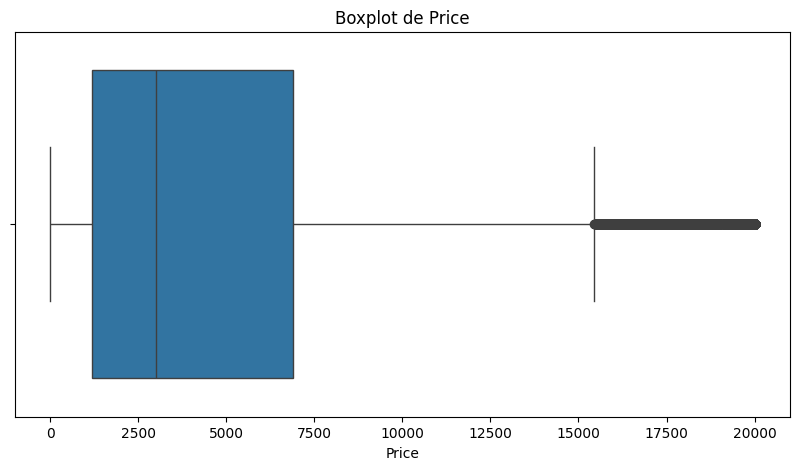

In [41]:
plt.figure(figsize =(10,5))
sns.boxplot(x = df['Price'])
plt.title('Boxplot de Price')
plt.xlabel('Price')
plt.show()

In [42]:
df.loc[df["Price"] == 0, "Price"] =df[df["Price"]!=0]["Price"].median()
df.loc[df["Price"] == 1, "Price"] =df[df["Price"]!=0]["Price"].median()


Bigote_superior = df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))

df = df[df['Price'] < Bigote_superior].reset_index(drop=True)

df[df["Price"]!=0]["Price"].median()

3000.0

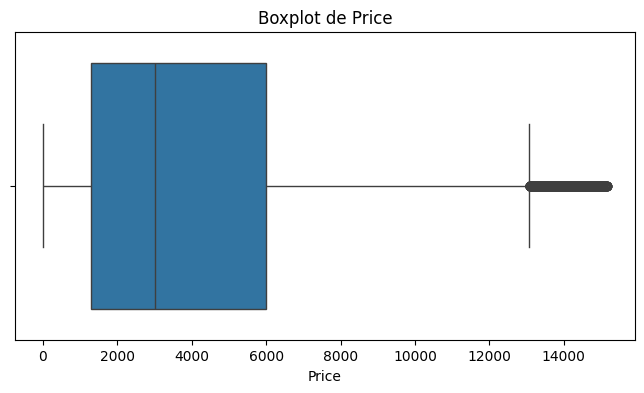

In [43]:
plt.figure(figsize =(8,4))
sns.boxplot(x = df['Price'])
plt.title('Boxplot de Price')
plt.xlabel('Price')
plt.show()

In [44]:
df.groupby('Price').count().sort_values(by = 'Price').head()

,VehicleType,RegistrationYear,Gearbox,Power,Mileage,FuelType,NotRepaired
Price,,,,,,,
2,8,12,9,12,12,10,12
3,4,7,4,7,7,4,7
4,0,1,0,1,1,0,1
5,15,24,13,24,24,10,24
7,1,3,1,3,3,2,3


### Análisis de 'RegistrationYear'

In [45]:
df.groupby('RegistrationYear').count().sort_values(by = 'RegistrationYear').head()

,Price,VehicleType,Gearbox,Power,Mileage,FuelType,NotRepaired
RegistrationYear,,,,,,,
1000,30,0,3,30,30,6,30
1001,1,0,0,1,1,0,1
1039,1,0,0,1,1,1,1
1111,2,0,0,2,2,0,2
1200,1,0,1,1,1,1,1


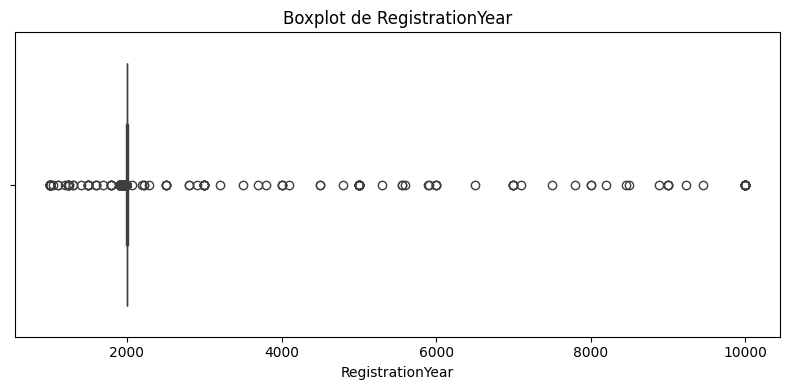

In [46]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['RegistrationYear'])
plt.xlabel('RegistrationYear')
plt.title('Boxplot de RegistrationYear')

plt.tight_layout()
plt.show()

In [47]:
df.loc[df['RegistrationYear'] > 2024, 'RegistrationYear'] = df[df['RegistrationYear'] !=0] ['RegistrationYear'].median().astype(int)
df.loc[df['RegistrationYear'] < 1900, 'RegistrationYear'] = df[df['RegistrationYear']!=0] ['RegistrationYear'].median().astype(int)
df.groupby("RegistrationYear").count().head(10)

,Price,VehicleType,Gearbox,Power,Mileage,FuelType,NotRepaired
RegistrationYear,,,,,,,
1910,64,28,25,64,64,24,64
1915,1,1,0,1,1,0,1
1919,1,1,1,1,1,1,1
1920,1,1,0,1,1,1,1
1923,2,2,2,2,2,2,2
1925,1,1,0,1,1,0,1
1928,2,2,1,2,2,1,2
1929,5,5,3,5,5,4,5
1930,2,2,2,2,2,2,2


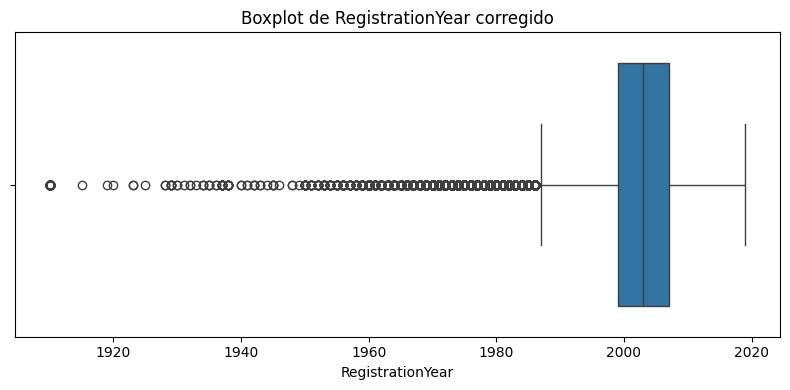

In [48]:
plt.figure(figsize = (8,4))
sns.boxplot(x = df['RegistrationYear'])
plt.xlabel('RegistrationYear')
plt.title('Boxplot de RegistrationYear corregido')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien

</div>

### Análisis de 'Power'

In [49]:
df.groupby("Power").count().head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Mileage,FuelType,NotRepaired
Power,,,,,,,
0,28198,19605,28198,20134,28198,20703,28198
1,32,25,32,26,32,24,32
2,10,9,10,9,10,8,10
3,9,8,9,9,9,8,9
4,26,23,26,26,26,22,26
5,96,89,96,92,96,89,96
6,11,11,11,11,11,8,11
7,11,10,11,10,11,11,11
8,7,6,7,6,7,6,7


<span style='color:green'> En este caso en específico se investigará a profundidad y con escala logaritmica ya que tiene muchos datos que afectarán en los cálculos del modelo más adelante. </span>

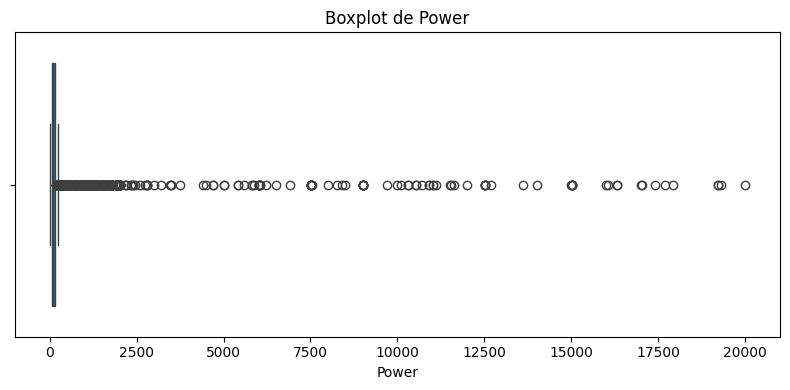

In [50]:
plt.figure(figsize = (8,4))

sns.boxplot(x=df['Power'])
plt.title('Boxplot de Power')
plt.xlabel('Power')

plt.tight_layout()

plt.show()

<span style='color:green'> Estos valores se llenarán con un pequeño modelo de regresión lineal para las entrada con valor a cero y se quitarán outliers. </span>

In [51]:
features = df[['Price', 'RegistrationYear', 'Mileage']]
target = df['Power']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = 12345)
model = LinearRegression()
model.fit(features_train, target_train)

#Predicción para los valores con entradas iguales a cero
missing_values = df[df['Power'] == 0]
predicted_values_power = model.predict(missing_values[['Price', 'RegistrationYear', 'Mileage']])

df.loc[df['Power'] == 0, 'Power'] = np.int64(predicted_values_power)

#### Eliminación de outliers

In [52]:
Q1 = df['Power'].quantile(0.25)
Q3 = df['Power'].quantile(0.75)
IQR = Q3 - Q1

bigote_inferior = Q1 - 1.5 * IQR
bigote_superior= Q1 + 1.5 * IQR

# Identificación de los límites de los datos
df = df[df['Power'] > bigote_inferior].reset_index(drop=True)
df = df[df['Power'] < bigote_superior].reset_index(drop=True)

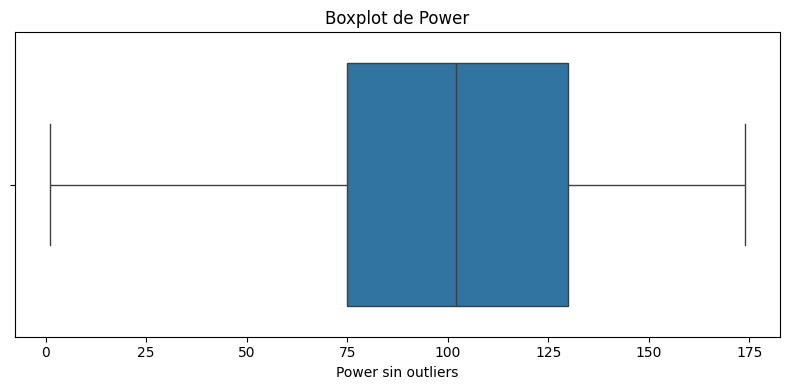

In [53]:
plt.figure(figsize=(8, 4))


sns.boxplot(x=df['Power'])
plt.title('Boxplot de Power')
plt.xlabel('Power sin outliers')

plt.tight_layout()
plt.show()

<span style='color:green'> A comparación del otro boxplot se nota la diferencia con la eliminación de los outliers y ahora bien, estos datos ya no tendrían que hacer diferencias grandes a la hora de probar nuestro modelos. Se observa que ahora como cuartil 0.75 está cerca de 175 y el cuartil 0.25 cerca de cero, pero solo eso. </span>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, bien hecho

</div>

### Datos nulos

In [54]:
for column in df.columns:
    if df[column].dtype == 'object':
        
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        
        df[column] = df[column].fillna(df[column].mean())


#df.dropna(how='all', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237444 entries, 0 to 237443
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             237444 non-null  int64 
 1   VehicleType       237444 non-null  object
 2   RegistrationYear  237444 non-null  int64 
 3   Gearbox           237444 non-null  object
 4   Power             237444 non-null  int64 
 5   Mileage           237444 non-null  int64 
 6   FuelType          237444 non-null  object
 7   NotRepaired       237444 non-null  object
dtypes: int64(4), object(4)
memory usage: 14.5+ MB


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

De algunas filas se eliminaron hasta 40 mil registros. No estoy seguro que sea la decisión correcta, atención a eliminar tantos nulos.

</div>

In [55]:
df.isnull().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Mileage             0
FuelType            0
NotRepaired         0
dtype: int64

<span style='color:green'> La variables que aún tienen nulos las llenaré con 'NaN' ya que por ejemplo el modelo 'Catboost' no admite valores nulos  </span>

In [56]:
df.fillna(value='NaN', inplace=True)
df.isnull().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Mileage             0
FuelType            0
NotRepaired         0
dtype: int64

## Entrenamiento del modelo 

### Codificación para: Bosque Aleatorio y Regresión Lineal

In [57]:
df_ohe=pd.get_dummies(df,drop_first=True)

In [58]:
display(df.columns)
display(df_ohe.columns)


Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power',
       'Mileage', 'FuelType', 'NotRepaired'],
      dtype='object')

Index(['Price', 'RegistrationYear', 'Power', 'Mileage',
       'VehicleType_convertible', 'VehicleType_coupe', 'VehicleType_other',
       'VehicleType_sedan', 'VehicleType_small', 'VehicleType_suv',
       'VehicleType_wagon', 'Gearbox_manual', 'FuelType_electric',
       'FuelType_gasoline', 'FuelType_hybrid', 'FuelType_lpg',
       'FuelType_other', 'FuelType_petrol', 'NotRepaired_1',
       'NotRepaired_NaN'],
      dtype='object')

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Estas son demasiadas columnas, te recomiendo no considerar ni Model ni Brand para tener menos features. Cuando la dimensión de la data aumenta tanto, se vuelve difícil entrenar los algoritmos ya que el espacio crece exponencialmente. Por favor, cambia esto y prueba nuevamente los modelos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, ahora la data ohe tiene una cantidad más razonable de columnas
</div>

#### DF común

In [59]:
features = df.drop("Price",axis=1)
target = df["Price"]

features_train, features_valid, target_train, target_valid = train_test_split(features, target, random_state=54321, test_size =0.25) 

#### DF con OHE

In [60]:
features = df_ohe.drop("Price",axis=1)
target = df_ohe["Price"]

features_train_ohe, features_valid_ohe, target_train_ohe, target_valid_ohe = train_test_split(features, target, random_state=54321, test_size =0.75) 

### Escalado de características

<span style='color:green'> Algunos modelos necesitan necesitan el escalado ya que son afectados por valores extremos lo que da más peso a las columnas por lo que se escalan los datos   </span>

In [61]:
numerics = features_train.select_dtypes(include = ['int64', 'float64']).columns
scaler = StandardScaler()
scaler.fit(features_train[numerics])
features_train[numerics] = scaler.transform(features_train[numerics])
features_valid[numerics] = scaler.transform(features_valid[numerics])

features_train_ohe = features_train_ohe.copy()
features_valid_ohe = features_valid_ohe.copy()

scaler2 = StandardScaler()
scaler2.fit(features_train_ohe[numerics])
features_train_ohe[numerics]=scaler2.transform(features_train_ohe[numerics])
features_valid_ohe[numerics]=scaler2.transform(features_valid_ohe[numerics])

###  Modelo: Decision Tree Regressor

In [62]:
%%time 
start_time = time.time()

best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeRegressor(max_depth= depth, random_state=12345)
    model.fit(features_train_ohe,target_train_ohe) 
    predictions_valid_ohe = model.predict(features_valid_ohe) 
    result = (mean_squared_error(target_valid_ohe,predictions_valid_ohe))**0.5
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth
    
end_time = time.time()
tree_time= end_time - start_time
error_tree=best_result
print(f"RECM del mejor modelo con el conjunto de validación: {best_result} con una profundidad maxima de {best_depth}")

RECM del mejor modelo con el conjunto de validación: 1735.3744429156752 con una profundidad maxima de 10
CPU times: total: 766 ms
Wall time: 952 ms


###  Modelo: Random Forest Regressor

In [63]:
%%time 
start_time = time.time()

best_error = 10000 
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=54321, n_estimators=est , max_depth=depth)
        model.fit(features_train_ohe,target_train_ohe) 
        predictions_valid_ohe = model.predict(features_valid_ohe) 
        error = (mean_squared_error(target_valid_ohe,predictions_valid_ohe))**0.5 
        
        if error < best_error: 
            best_error = error
            best_est = est
            best_depth = depth
error_forest=best_error
end_time = time.time()
forest_time= end_time - start_time

print("\nRECM del mejor modelo con el conjunto de validación:", error_forest,"\nHiperparametros:\n n_estimators:", best_est, "\n best_depth:", best_depth)


RECM del mejor modelo con el conjunto de validación: 1650.0598656855864 
Hiperparametros:
 n_estimators: 50 
 best_depth: 10
CPU times: total: 1min 9s
Wall time: 1min 23s


###  Modelo: Regresión Lineal

In [64]:
%%time
start_time=time.time()
model = LinearRegression()
model.fit(features_train_ohe, target_train_ohe) 
predictions_valid_ohe = model.predict(features_valid_ohe) 

result =mean_squared_error(target_valid_ohe,predictions_valid_ohe)**0.5 



print("RECM del modelo de regresión lineal con el conjunto de validación:", result)
error_regresion=result
end_time = time.time()
regresión_time= end_time - start_time

RECM del modelo de regresión lineal con el conjunto de validación: 2382.069237523468
CPU times: total: 62.5 ms
Wall time: 90.2 ms


<span style='color:green'> El uso de demasiadas características codificadas con OHE dificulta el rendimiento de este modelo, por lo que intentaremos utilizar únicamente las características numéricas.  </span>

In [65]:
%%time

start_time=time.time()
model = LinearRegression()
model.fit(features_train_ohe[numerics], target_train_ohe) 
predictions_valid_ohe = model.predict(features_valid_ohe[numerics]) 

result =mean_squared_error(target_valid_ohe,predictions_valid_ohe)**0.5 

print("RECM del modelo de regresión lineal con el conjunto de validación:", result)
error_regresion=result
end_time = time.time()
regresión_time= end_time - start_time

RECM del modelo de regresión lineal con el conjunto de validación: 2585.090890660781
CPU times: total: 15.6 ms
Wall time: 26.9 ms


<span style='color:green'> Podemos apreciar un error razonable pero no es el ideal para continuar  </span>

###  Modelo: CatBoost con Potenciación del Gradiente

<span style='color:green'> En el caso de este modelo se le indicarán qué características son categóricas </span>

In [66]:
categorias = features_train.select_dtypes(include=['object']).columns
print(categorias)
indices_categorias = [features_train.columns.get_loc(categoria) for categoria in categorias]
print("Índices de las columnas categóricas:", indices_categorias)

Index(['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired'], dtype='object')
Índices de las columnas categóricas: [0, 2, 5, 6]


In [67]:
%%time
start_time= time.time()
best_error = 10000
best_est = 0
best_depth = 0

# Iterar sobre diferentes hiperparámetros
for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = CatBoostRegressor(iterations=est, depth=depth, random_seed=54321, 
                          learning_rate=0.1, loss_function='RMSE', task_type="CPU", 
                          silent=True)





        model.fit(features_train, target_train, cat_features=indices_categorias)
        predictions_valid = model.predict(features_valid)
        error = np.sqrt(mean_squared_error(target_valid, predictions_valid))
        #print(f"Validación RECM para los n_estimators de {est}, depth={depth} es {error}")
        if error < best_error:
            best_error = error
            best_est = est
            best_depth = depth
error_catboost=best_error
end_time = time.time()
catboost_time= end_time - start_time
print(f"RECM del mejor modelo en el conjunto de validación: {best_error}, n_estimators: {best_est}, best_depth: {best_depth}")

RECM del mejor modelo en el conjunto de validación: 1629.4522530475451, n_estimators: 50, best_depth: 10
CPU times: total: 1min 50s
Wall time: 2min 15s


###  Modelo: LightGBM con Potenciación de Gradiente

<span style='color:green'> Para este modelo se le darán las características categóricas y se entrenará un arbol a través de LightGBM</span>

In [69]:
categorical_features = ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired']

for col in categorical_features:
    df[col] = df[col].astype('category').cat.codes
display(df)
df.info()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Mileage,FuelType,NotRepaired
0,480,4,1993,1,95,150000,6,2
1,9800,6,2004,0,163,125000,2,2
2,1500,5,2001,1,75,150000,6,0
3,3600,5,2008,1,69,90000,2,0
4,650,4,1995,1,102,150000,6,1
...,...,...,...,...,...,...,...,...
237439,5250,4,2016,0,150,150000,6,0
237440,2200,4,2005,1,46,20000,6,2
237441,1199,1,2000,0,101,125000,6,0
237442,9200,0,1996,1,102,150000,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237444 entries, 0 to 237443
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   Price             237444 non-null  int64
 1   VehicleType       237444 non-null  int8 
 2   RegistrationYear  237444 non-null  int64
 3   Gearbox           237444 non-null  int8 
 4   Power             237444 non-null  int64
 5   Mileage           237444 non-null  int64
 6   FuelType          237444 non-null  int8 
 7   NotRepaired       237444 non-null  int8 
dtypes: int64(4), int8(4)
memory usage: 8.2 MB


In [70]:
features = df.drop("Price",axis=1)
target = df["Price"]

features_train, features_valid, target_train, target_valid = train_test_split(features, target, random_state=54321, test_size =0.25) 


<span style='color:green'> Por el paso anterior se va a dividir el DF preprocesado con el objetivo y características, y los conjuntos de validación y entrenamiento </span>

In [71]:
train_data = lgb.Dataset(features_train, label=target_train, categorical_feature=indices_categorias, free_raw_data=False)
valid_data = lgb.Dataset(features_valid, label=target_valid, reference=train_data, free_raw_data=False)

<span style='color:green'> Se usa 'categorical_feature' para indicarle a este modelo explícitamente cuales son las columnas categóricas y en este caso no se liberan los DF's con 'free_raw_data=False' </span>


In [72]:
%%time
start_time = time.time()

best_error = 10000
best_est = 0
best_depth = 0


for est in range(10, 51, 10):  
    for depth in range(1, 11):  
        num_leaves = max(2, 2**depth - 1)  

        # Parámetros 
        params = {
            'objective': 'regression',  # Tipo de modelo (regresión)
            'metric': 'rmse',           # Métrica a usar (RMSE)
            'boosting_type': 'gbdt',    # Tipo de boosting: Gradient Boosting Decision Tree
            'num_leaves': num_leaves,   # Número de nodos finales del árbol
            'learning_rate': 0.1,       # Tasa de aprendizaje
            'device': 'cpu',            # Usar la CPU 
            'verbose': -1,              # Desactivar la salida de cada iteración
            'early_stopping_rounds': 10  # Para evitar el sobreajuste (detener si no mejora después de 10 rondas)
        }

       
        model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=est)
        predictions_valid = model.predict(features_valid)
        error = np.sqrt(mean_squared_error(target_valid, predictions_valid))

       
        if error < best_error:
            best_error = error
            best_est = est
            best_depth = depth


error_lightGBM = best_error
end_time = time.time()  
lightGBM_time = end_time - start_time  


print(f"RECM del mejor modelo en el conjunto de validación: {best_error}, n_estimators: {best_est}, best_depth: {best_depth}")


RECM del mejor modelo en el conjunto de validación: 1510.2666624472313, n_estimators: 50, best_depth: 10
CPU times: total: 3min 38s
Wall time: 31.9 s


### Modelo: XGBoost con Potenciación de Gradiente

<span style='color:green'> Para este modelo también se requiere que las columnas categóricas sean modificadas ocn OHE </span>

In [73]:
train_data = xgb.DMatrix(features_train_ohe, label=target_train_ohe)
valid_data = xgb.DMatrix(features_valid_ohe, label=target_valid_ohe)

In [74]:


best_error = float("inf")
best_est = 0
best_depth = 0

# Parámetros
for est in range(10, 101, 10):  
    for depth in range(3, 11):  
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'max_depth': depth,
            'eta': 0.1,
            'tree_method': 'hist'  
        }
        
        
        model = xgb.train(params, train_data, num_boost_round=est)
        predictions_valid = model.predict(valid_data)
        error = np.sqrt(mean_squared_error(target_valid_ohe, predictions_valid))
        
        
        if error < best_error:
            best_error = error
            best_est = est
            best_depth = depth
            print(f"Nuevo mejor modelo - Depth: {depth}, Estimators: {est}, RMSE: {error}")


error_XGBoost=best_error
end_time = time.time()
XGBoost_time= end_time - start_time

print(f"\nMejor modelo encontrado:")
print(f"RMSE: {best_error}, Estimators: {best_est}, Max Depth: {best_depth}")

        


Nuevo mejor modelo - Depth: 3, Estimators: 10, RMSE: 2299.310657566741
Nuevo mejor modelo - Depth: 4, Estimators: 10, RMSE: 2174.7304430664503
Nuevo mejor modelo - Depth: 5, Estimators: 10, RMSE: 2097.094656900351
Nuevo mejor modelo - Depth: 6, Estimators: 10, RMSE: 2046.745709657162
Nuevo mejor modelo - Depth: 7, Estimators: 10, RMSE: 2009.2554591191235
Nuevo mejor modelo - Depth: 8, Estimators: 10, RMSE: 1980.4681895955814
Nuevo mejor modelo - Depth: 9, Estimators: 10, RMSE: 1955.4196480551177
Nuevo mejor modelo - Depth: 10, Estimators: 10, RMSE: 1939.9037347249991
Nuevo mejor modelo - Depth: 4, Estimators: 20, RMSE: 1847.9121326513336
Nuevo mejor modelo - Depth: 5, Estimators: 20, RMSE: 1780.3637268827963
Nuevo mejor modelo - Depth: 6, Estimators: 20, RMSE: 1737.809037265027
Nuevo mejor modelo - Depth: 7, Estimators: 20, RMSE: 1705.0950853251557
Nuevo mejor modelo - Depth: 8, Estimators: 20, RMSE: 1679.9125721298713
Nuevo mejor modelo - Depth: 9, Estimators: 20, RMSE: 1657.984695345

### Tabla con info de todos los modelos

In [75]:
df_modelos = pd.DataFrame({
    'Modelo': ['Bosque_de_decisión','Arbol_de_decisión', 'regresion_lineal',"catboost","lightGBM","XGBoost"],
    'Error': [error_forest,error_tree, error_regresion, error_catboost, error_lightGBM, error_XGBoost],
    'Tiempo de entrenamiento': [forest_time,tree_time,regresión_time, catboost_time, lightGBM_time,XGBoost_time ]
})
df_modelos

,Modelo,Error,Tiempo de entrenamiento
0,Bosque_de_decisión,1650.059866,83.817808
1,Arbol_de_decisión,1735.374443,0.952202
2,regresion_lineal,2585.090891,0.026907
3,catboost,1629.452253,135.001137
4,lightGBM,1510.266662,31.930981
5,XGBoost,1559.805677,343.482279


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Buen trabajo, la tabla resumen permite comparar los modelos. En este caso vemos como podemos hacer un tradeoff entre rapidez y precisión.
</div>

## Conclusiones

<span style='color:green'> Dado que la empresa como principal objetivo necesita mejorar la calidad de la predicción sin perder la velocidad. El modelo LightGBM podría ser el elegido para realizar los cálculos. El bajo indica que es un modelo con menor error y asegura que las predicciones serán lo más cercanas a la realidad. El tiempo de entrenamiento a comparación de los demás ofrece una rápida actualización de ser necesaria. Entonces, como este modelo es capaz de entregar predicciones de calidad y tiene el mejor tiempo de entrenamiento (el que tiene mejor balance) es el elegido para Rusty Bargain. </span>

<div class="alert alert-block alert-info">
<b> Vale pues he removido Model y Brand para que no hiciera tanto ruido a la hora de entrenar a los modelos y los tiempos de entrenamiento disminuyeron significativamente en pro del estudio y los errores disminuyeron en la mayoría de los casos lo que indica que se tiene un mejor ajuste de los datos en los modelos. Los valores asignados como la moda y mediana para el manejo de nulos nos dio menos ruido y por eso se tuvo una mejor optimización en general.

Me quedaría para el manejo de los datos con LightGBM ya que tiene el error más bajo 1510.27 lo que lo hace más preciso y confiable. Y su tiempo de entrenamiento es razonablemente rápido a comparación de cuando tenía las demás características. Y también porque es un modelo que está diseñado para manejar mucho datos con muchas características y valores nulos.   </b> <a class="tocSkip"></a>
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores- [x]  Las celdas con el código han sido colocadas en orden de ejecución- [x]  Los datos han sido descargados y preparados- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos